In [26]:
## calculate the Allan variance for some good noise data
import bead_utils as bu
import numpy as np
import matplotlib.pyplot as plt
import allantools as at


In [21]:
data_path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/decay_analysis/data/20231121/LPmbar_xyzcool_200.h5"

In [22]:
data, attr, _ = bu.get_data(data_path)

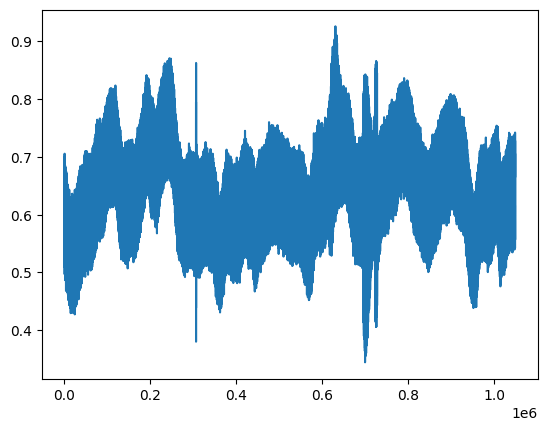

In [23]:
plt.plot(data[:,0])

Text(0, 0.5, 'Allan deviation, $\\sigma[\\tau]$ [V]')

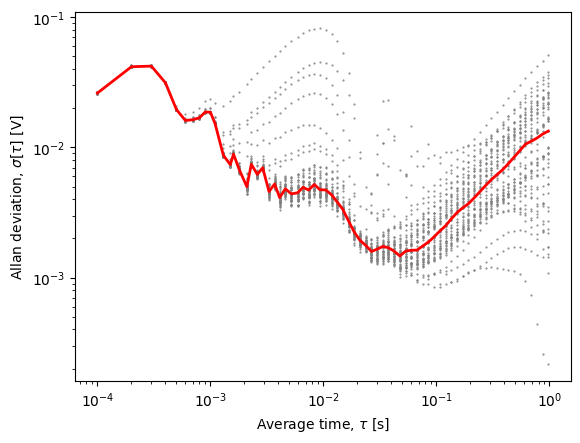

In [42]:
nchunks = 50
nperchuk = len(data[:,0])//nchunks

plt.figure()

out_dat = []
for n in range(nchunks):
    curr_data = data[n*nperchuk:(n+1)*nperchuk,0]   

    taus = np.logspace(-4, 1, 100)

    (t2, ad, ade, adn) = at.oadev(curr_data, rate=1e4, data_type="freq", taus=taus)

    plt.loglog(t2, ad, '.', color='gray', ms='1')

    out_dat.append(ad)

ad = np.array(out_dat)

plt.plot(t2, np.median(ad, axis=0), 'r', lw=2)
plt.xlabel(r"Average time, $\tau$ [s]")
plt.ylabel(r"Allan deviation, $\sigma[\tau]$ [V]")